In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e11/sample_submission.csv
/kaggle/input/playground-series-s5e11/train.csv
/kaggle/input/playground-series-s5e11/test.csv


In [2]:
model_scores = {'model':'score'}

In [ ]:
df = pd.read_csv('/07-midterm proj/train.csv')

df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
df.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

EDA

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print('\n')


id
[     0      1      2 ... 593991 593992 593993]
593994


annual_income
[29367.99 22108.02 49566.2  ... 26286.49 67431.54 18778.15]
119728


debt_to_income_ratio
[0.084   0.166   0.097   0.065   0.053   0.058   0.042   0.1     0.132
 0.121   0.087   0.149   0.154   0.06    0.083   0.051   0.089   0.088
 0.255   0.14    0.16    0.208   0.242   0.038   0.284   0.079   0.061
 0.136   0.152   0.104   0.068   0.271   0.091   0.153   0.172   0.212
 0.196   0.221   0.05    0.073   0.158   0.08    0.138   0.133   0.157
 0.086   0.094   0.291   0.056   0.127   0.063   0.243   0.183   0.105
 0.034   0.151   0.144   0.085   0.077   0.123   0.111   0.069   0.116
 0.039   0.037   0.148   0.049   0.096   0.146   0.107   0.067   0.09
 0.099   0.155   0.161   0.128   0.082   0.125   0.066   0.13    0.229
 0.081   0.059   0.101   0.106   0.174   0.093   0.195   0.135   0.191
 0.297   0.052   0.351   0.113   0.21    0.263   0.078   0.245   0.192
 0.219   0.046   0.129   0.12    0.173   0.026   0.211  

In [6]:
df.dtypes

id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object

In [5]:
numerical_vars = []
categorical_vars = []

for col in df.columns:
    if df[col].dtype != 'object':
        numerical_vars.append(col)
    else:
        categorical_vars.append(col)

numerical_vars, categorical_vars

(['id',
  'annual_income',
  'debt_to_income_ratio',
  'credit_score',
  'loan_amount',
  'interest_rate',
  'loan_paid_back'],
 ['gender',
  'marital_status',
  'education_level',
  'employment_status',
  'loan_purpose',
  'grade_subgrade'])

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


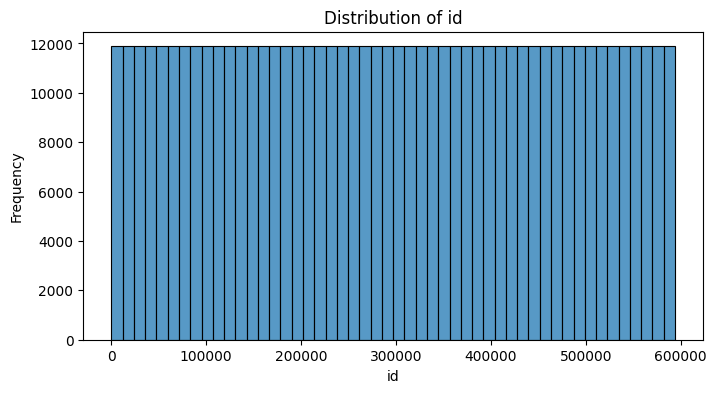

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


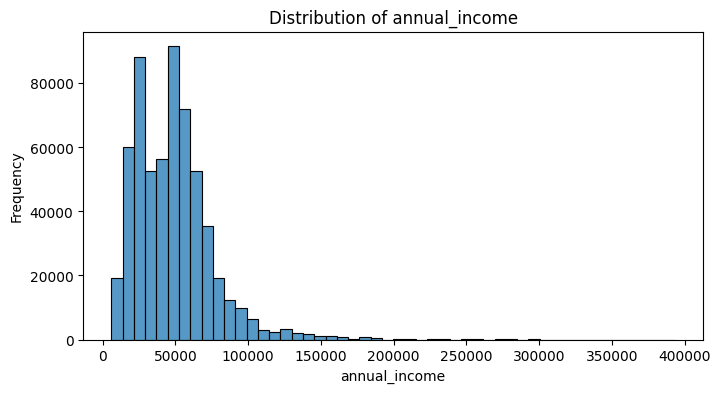

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


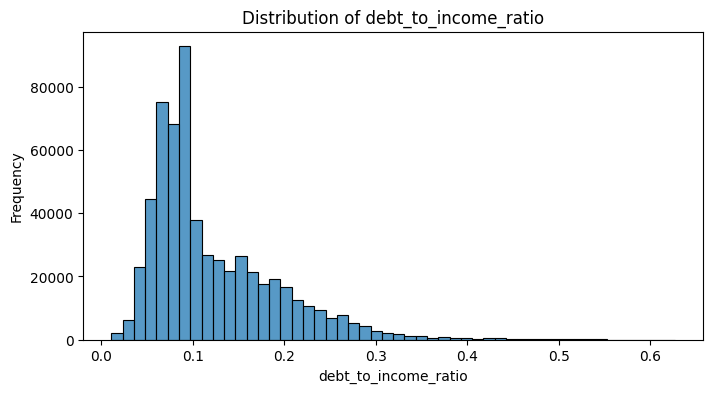

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


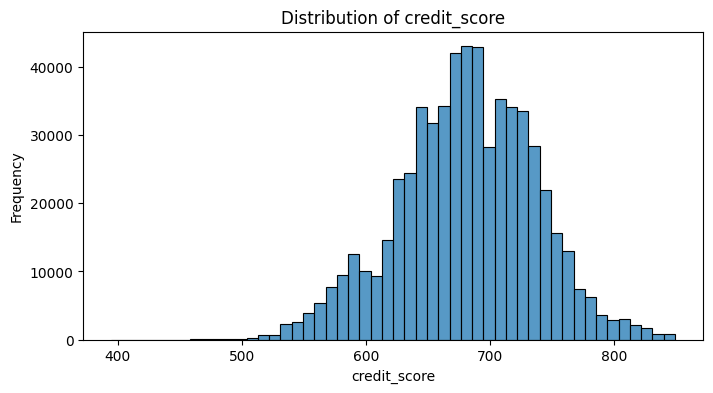

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


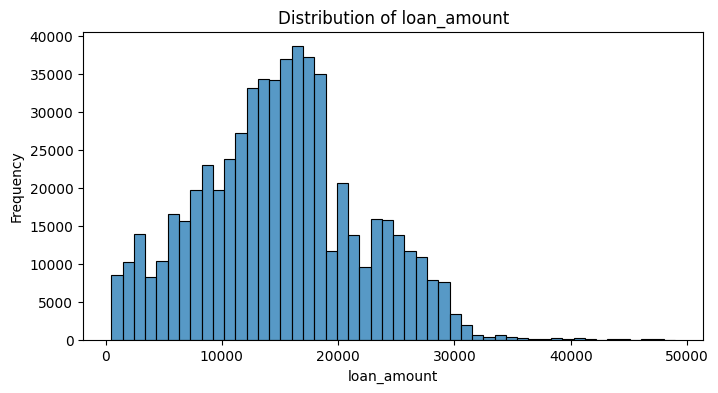

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


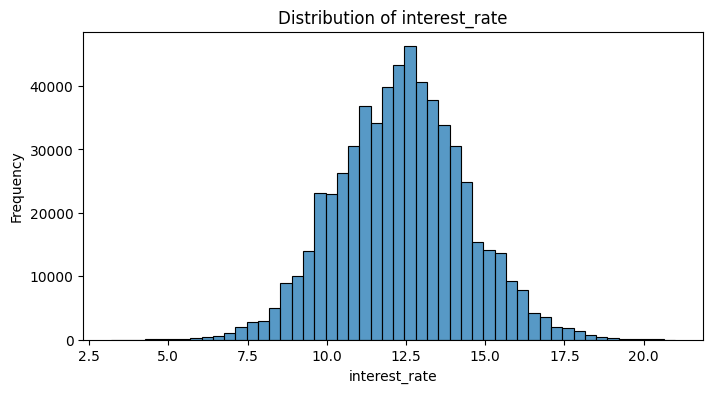

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


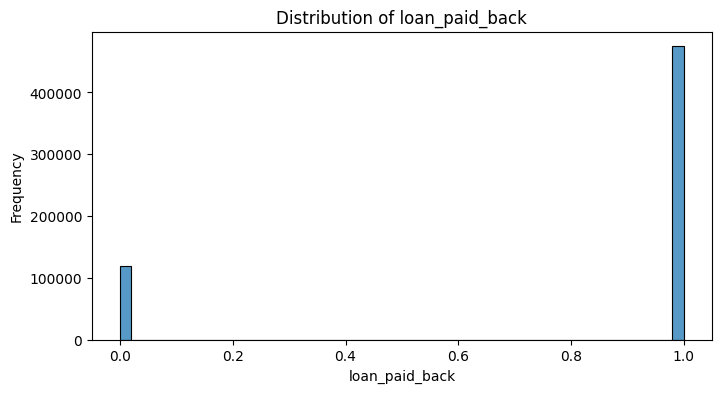

In [9]:
for col in numerical_vars:
    plt.figure(figsize=(8, 4))  # create a new figure for each plot
    sns.histplot(df[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
# will need to log and change values for loan_amount, annual_income

df['loan_amount'] = np.log1p(df.loan_amount)
df['annual_income'] = np.log1p(df.annual_income)


df['loan_amount'], df['annual_income']


(0         7.835745
 1         8.432528
 2         9.741330
 3         8.451797
 4         9.407996
             ...   
 593989    9.950341
 593990    8.088942
 593991    6.835475
 593992    9.698393
 593993    8.950109
 Name: loan_amount, Length: 593994, dtype: float64,
 0         10.287695
 1         10.003741
 2         10.811085
 3         10.754904
 4         10.146344
             ...    
 593989    10.043478
 593990    10.471367
 593991    10.760318
 593992    11.248301
 593993    10.798770
 Name: annual_income, Length: 593994, dtype: float64)

In [5]:
sns.histplot(df.annual_income, bins=50)

NameError: name 'sns' is not defined

In [6]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score

In [7]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=15)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=15)

In [8]:
y_train = df_train['loan_paid_back']
y_val = df_val['loan_paid_back']
y_test = df_test['loan_paid_back']

In [9]:
del df_train['loan_paid_back']
del df_val['loan_paid_back']
del df_test['loan_paid_back']

In [10]:
# df_train.columns, df_val.columns, df_test.columns
# len(y_train), len(df_train)

y_full_train = df_full_train['loan_paid_back']
del df_full_train['loan_paid_back']

y_full_train.shape, df_full_train.shape

((475195,), (475195, 12))

In [14]:
df_full_train.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade'],
      dtype='object')

In [15]:
def train_linear_model(x,y):
    train_dicts = x.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = LinearRegression()
    model.fit(X_train,y)
    return model

def test_model(model, x, y_val):
    val_dicts = x.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    X_val = dv.fit_transform(val_dicts)
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)

    score = accuracy_score(y_val,y_pred)

    return score

In [16]:
print(df_train.columns, df_val.columns, df_test.columns)


Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade'],
      dtype='object') Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade'],
      dtype='object') Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade'],
      dtype='object')


In [11]:
del df_train['id']
del df_val['id']
del df_test['id']

In [12]:
del df_full_train['id']

In [22]:
linear_model = train_linear_model(df_full_train, y_full_train)

In [23]:
score = test_model(linear_model, df_test, y_test)
score

0.8963206760999671

In [24]:
model_scores['linear_model'] = score
model_scores

{'model': 'score', 'linear_model': 0.8963206760999671}

### logistic regression

In [25]:
def train_logi_model(X,y,i=1):
    train_dicts = X.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(C=i)
    model.fit(X_train, y)

    return model

def test_logi_model(model, x, y_val):
    val_dicts = x.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    X_val = dv.fit_transform(val_dicts)
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)

    score = accuracy_score(y_val,y_pred)

    return score

In [26]:
logi_model = train_logi_model(df_full_train, y_full_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
score= test_model(logi_model, df_test, y_test)



In [28]:
model_scores['logistic_model'] = score
model_scores

{'model': 'score',
 'linear_model': 0.8963206760999671,
 'logistic_model': 0.8963711815756025}

In [29]:
# import warnings
# warnings.filterwarnings("ignore")

# removed_gender_df = df_train.drop('gender',axis=1)
# logi_model = train_logi_model(removed_gender_df, y_train)

# test_remove_gender_df = df_test.drop('gender',axis=1)
# test_model(logi_model, test_remove_gender_df, y_test)

## discarded because no major improvement # 0.8964890276854183

### DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier, export_text

In [31]:
def train_DT_model(X,y,d=4,s=1):
    train_dicts = X.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
    model.fit(X_train, y)

    return model

def test_DT_model(model, X, y):
    test_dicts = X.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    X_test = dv.fit_transform(test_dicts)

    y_pred = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y, y_pred)
    
    return auc

In [32]:
dt_model = train_DT_model(df_full_train, y_full_train)

In [33]:
test_DT_model(dt_model, df_test, y_test)

0.8888686101566248

In [34]:
for d in [1,2,3,4,5,6,7,8,9,10, None]:
    dt_model = train_DT_model(df_full_train, y_full_train,d)
    auc = test_DT_model(dt_model, df_test, y_test)

    print('%4s -> %.3f' % (d,auc))

   1 -> 0.732
   2 -> 0.829
   3 -> 0.852
   4 -> 0.889
   5 -> 0.901
   6 -> 0.906
   7 -> 0.909
   8 -> 0.910
   9 -> 0.911
  10 -> 0.910
None -> 0.770


In [35]:
# lets consider 7,8,9,10
scores = []
for d in [7,8,9,10]:
    for s in [1,2,5,10,15,20, 100, 200, 500, 1000]:
        dt_model = train_DT_model(df_full_train, y_full_train,d,s)
        auc = test_DT_model(dt_model, df_test, y_test)
        scores.append((d,s,auc))
        print('(%4s %4d) -> %.3f' % (d,s,auc))


(   7    1) -> 0.909
(   7    2) -> 0.909
(   7    5) -> 0.909
(   7   10) -> 0.909
(   7   15) -> 0.909
(   7   20) -> 0.909
(   7  100) -> 0.909
(   7  200) -> 0.909
(   7  500) -> 0.909
(   7 1000) -> 0.909
(   8    1) -> 0.910
(   8    2) -> 0.910
(   8    5) -> 0.911
(   8   10) -> 0.911
(   8   15) -> 0.911
(   8   20) -> 0.911
(   8  100) -> 0.911
(   8  200) -> 0.911
(   8  500) -> 0.911
(   8 1000) -> 0.910
(   9    1) -> 0.911
(   9    2) -> 0.911
(   9    5) -> 0.912
(   9   10) -> 0.912
(   9   15) -> 0.912
(   9   20) -> 0.912
(   9  100) -> 0.913
(   9  200) -> 0.913
(   9  500) -> 0.912
(   9 1000) -> 0.911
(  10    1) -> 0.910
(  10    2) -> 0.910
(  10    5) -> 0.912
(  10   10) -> 0.913
(  10   15) -> 0.913
(  10   20) -> 0.913
(  10  100) -> 0.914
(  10  200) -> 0.914
(  10  500) -> 0.913
(  10 1000) -> 0.912


In [36]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns= columns)
df_scores.sort_values(by = 'auc', ascending = False)

,max_depth,min_samples_leaf,auc
37,10,200,0.913765
36,10,100,0.913637
38,10,500,0.913156
35,10,20,0.912987
27,9,200,0.912813
34,10,15,0.912769
26,9,100,0.912764
33,10,10,0.912536
25,9,20,0.912379
24,9,15,0.912286


In [37]:
df_scores.sort_values(by = 'auc', ascending = False).head(1).values[0][2]

0.9137654920287732

In [38]:
model_scores['DecisionTreeClassifier'] = df_scores.sort_values(by = 'auc', ascending = False).head(1).values[0][2]
model_scores

{'model': 'score',
 'linear_model': 0.8963206760999671,
 'logistic_model': 0.8963711815756025,
 'DecisionTreeClassifier': 0.9137654920287732}

### randomForests

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
def train_rf_model(X,y,n=10, d =10, s=100):
    train_dicts = X.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = RandomForestClassifier(n_estimators = n, random_state = 1, max_depth = d, min_samples_leaf = s, n_jobs=-1)
    model.fit(X_train, y)

    return model

def test_rf_model(model, X, y):
    test_dicts = X.to_dict(orient = 'records')
    dv = DictVectorizer(sparse=False)
    X_test = dv.fit_transform(test_dicts)

    y_pred = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y, y_pred)
    
    return auc

In [41]:
rf_model = train_rf_model(df_full_train, y_full_train)

In [42]:
test_rf_model(rf_model, df_test,y_test)

0.8972773811063564

In [43]:
scores = []

for n in range(10, 201, 10):
    for d in [9,10]:
        for s in [15, 20, 100, 200]:
            rf = train_rf_model(df_full_train, y_full_train, n,d,s)
        
            auc = test_rf_model(rf, df_test, y_test)
            print('%4s %4s %4s -> %.3f' % (n,d,s,auc))    
            scores.append((n,d,s,auc))

  10    9   15 -> 0.894
  10    9   20 -> 0.892
  10    9  100 -> 0.899
  10    9  200 -> 0.890
  10   10   15 -> 0.899
  10   10   20 -> 0.898
  10   10  100 -> 0.897
  10   10  200 -> 0.896
  20    9   15 -> 0.902
  20    9   20 -> 0.902
  20    9  100 -> 0.904
  20    9  200 -> 0.900
  20   10   15 -> 0.904
  20   10   20 -> 0.903
  20   10  100 -> 0.902
  20   10  200 -> 0.904
  30    9   15 -> 0.905
  30    9   20 -> 0.904
  30    9  100 -> 0.904
  30    9  200 -> 0.904
  30   10   15 -> 0.906
  30   10   20 -> 0.905
  30   10  100 -> 0.906
  30   10  200 -> 0.905
  40    9   15 -> 0.905
  40    9   20 -> 0.905
  40    9  100 -> 0.904
  40    9  200 -> 0.905
  40   10   15 -> 0.906
  40   10   20 -> 0.906
  40   10  100 -> 0.906
  40   10  200 -> 0.906
  50    9   15 -> 0.906
  50    9   20 -> 0.906
  50    9  100 -> 0.905
  50    9  200 -> 0.906
  50   10   15 -> 0.906
  50   10   20 -> 0.907
  50   10  100 -> 0.906
  50   10  200 -> 0.906
  60    9   15 -> 0.905
  60    9   20 -

In [44]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'min_sample_leaf', 'auc'])
df_scores.sort_values(by = 'auc', ascending = False)

,n_estimators,max_depth,min_sample_leaf,auc
61,80,10,20,0.907370
53,70,10,20,0.907337
125,160,10,20,0.907315
156,200,10,15,0.907237
117,150,10,20,0.907237
...,...,...,...,...
6,10,10,100,0.897277
7,10,10,200,0.896497
0,10,9,15,0.893518
1,10,9,20,0.892474


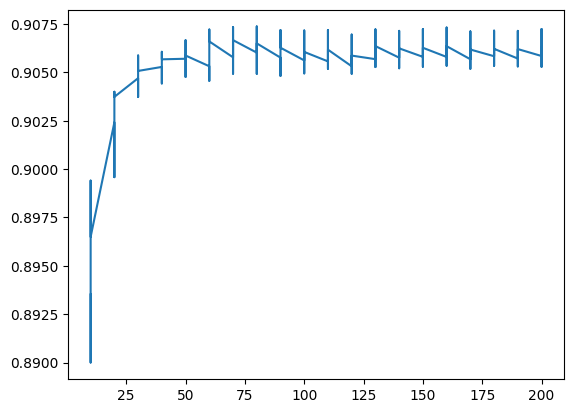

In [45]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [46]:
model_scores['RandomForestClassifier'] = df_scores.sort_values(by = 'auc', ascending = False).values[0][3]
model_scores

{'model': 'score',
 'linear_model': 0.8963206760999671,
 'logistic_model': 0.8963711815756025,
 'DecisionTreeClassifier': 0.9137654920287732,
 'RandomForestClassifier': 0.9073703120136152}

### xgboost

In [19]:
!pip install xgboost

In [14]:
import xgboost as xgb

In [15]:
train_dicts = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
# X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

In [16]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label = y_full_train, feature_names = features)

In [17]:
# dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)
dtest = xgb.DMatrix(X_test, label = y_test, feature_names = features)

In [52]:
'''
eta -> how fast the model learns. Default value= 0.3
max_depth -> controls the size of the trees. Default value= 6
min_child_weight -> same as min_samples_leaf. Default value= 1
objective -> need to define for what we are using, in our case binary:logistic. we can even use this for regression and others
nthread -> number of cores to use
eval_metric -> which metric should be used to evaluate the model

seed -> controls the randomness
verbosity -> control how many warnings to be shown

'''

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 100,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [53]:
y_pred = model.predict(dtest)

In [54]:
roc_auc_score(y_test, y_pred)

0.9194782527240379

In [18]:
def train_xgb_model(dtrain, e=0.3, d=10, s=100, nbr=100):
    xgb_params = {
        'eta': e, 
        'max_depth': d,
        'min_child_weight': s,
        
        'objective': 'binary:logistic',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=nbr)
    return model

def test_xgb_model(model, x, y):
    y_pred = model.predict(x)
    auc = roc_auc_score(y, y_pred)
    return auc

In [ ]:
scores = []
for e in [0.2,0.3,0.4,0.5]:
    for d in [9,10]:
        for s in [15,20,50,100,200]:
            for nbr in [100,150, 200,250, 300]:
                model = train_xgb_model(dtrain, e, d, s, nbr)

                auc = test_xgb_model(model,dtest, y_test)

                print('%4s %4s %4s %4s -> %.3f' % (e, d, s, nbr, auc))
                scores.append((e, d, s, nbr, auc))
                

 0.2    9   15  100 -> 0.919
 0.2    9   15  150 -> 0.919
 0.2    9   15  200 -> 0.919
 0.2    9   15  250 -> 0.918
 0.2    9   15  300 -> 0.918
 0.2    9   20  100 -> 0.920
 0.2    9   20  150 -> 0.920
 0.2    9   20  200 -> 0.919
 0.2    9   20  250 -> 0.919
 0.2    9   20  300 -> 0.918
 0.2    9   50  100 -> 0.920
 0.2    9   50  150 -> 0.920
 0.2    9   50  200 -> 0.920
 0.2    9   50  250 -> 0.920
 0.2    9   50  300 -> 0.919
 0.2    9  100  100 -> 0.920
 0.2    9  100  150 -> 0.921
 0.2    9  100  200 -> 0.921
 0.2    9  100  250 -> 0.921
 0.2    9  100  300 -> 0.920
 0.2    9  200  100 -> 0.920
 0.2    9  200  150 -> 0.920
 0.2    9  200  200 -> 0.920
 0.2    9  200  250 -> 0.920
 0.2    9  200  300 -> 0.920
 0.2   10   15  100 -> 0.919
 0.2   10   15  150 -> 0.919
 0.2   10   15  200 -> 0.918
 0.2   10   15  250 -> 0.917
 0.2   10   15  300 -> 0.917
 0.2   10   20  100 -> 0.920
 0.2   10   20  150 -> 0.919
 0.2   10   20  200 -> 0.918
 0.2   10   20  250 -> 0.918
 0.2   10   20

In [ ]:
df_scores = pd.DataFrame(scores, columns=['eta', 'max_depth', 'min_child_weight', 'num_boost_round', 'auc'])
df_scores.sort_values(by = 'auc', ascending = False)

In [24]:
 # 0.2    9  100  150 -> 0.921
 # 0.2    9  100  200 -> 0.921
 # 0.2    9  100  250 -> 0.921

model = train_xgb_model(dtrain, 0.2, 9, 100, 200)

auc = test_xgb_model(model,dtest, y_test)

auc

0.9206602547483258

In [25]:
import pickle

In [26]:
output_file = f"model.bin"

with open(output_file,'wb') as f_out:
    pickle.dump((dv,model), f_out)

In [27]:
# trying to open the saved model

with open('model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [28]:
dv, model

(DictVectorizer(sparse=False), <xgboost.core.Booster at 0x7c2cd3e90490>)

In [34]:
features = list(dv.get_feature_names_out())
loan_data = {
    "annual_income": 29367.99,
    "debt_to_income_ratio": 0.084,
    "credit_score": 736,
    "loan_amount": 2528.42,
    "interest_rate": 13.67,
    "gender": "Female",
    "marital_status": "Single",
    "education_level": "High School",
    "employment_status": "Self-employed",
    "loan_purpose": "Other",
    "grade_subgrade": "C3"
}
X = dv.transform([loan_data])
# "loan_paid_back": 1.0

In [35]:
dtest = xgb.DMatrix(X, feature_names = features)

In [37]:
model.predict(dtest)

array([0.9673196], dtype=float32)

In [38]:
probability = model.predict(dtest)[0]
prediction = int(probability >= 0.5)
print(prediction)  # Will print 1 if probability ≥ 0.5, else 0


1
